<a href="https://colab.research.google.com/github/jacksonsin/data_science_with_python/blob/main/Task_2_NLP_Tree_Syntax_of_Natural_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
!pip install svgling
import pandas as pd
import nltk
import os
import svgling
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.data import load
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Loading Dataset

In [2]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/jacksonsin/datasets/main/TL_applicants_task_sentences.csv")
df.head()

,Workplaces are regulated by the governments,Canada makes it possible,Everyone is watching from the other side,Russia took their place,The natural gas makes electricity appear,Hydrogen is used as the fuel,Energy is created from nutritious food,Energy is a physical property,How can electricity be created,The tall girls spent time dancing,...,Most animals demand good care,The book mentions two prophets,There are several lines,Beautiful poetry can be long,There were many technical jobs in Madrid,How do I tune a saxophone,What are his dreams of the future,The landfills have a bad smell,There are many short verbs in English,How can clauses be joined


# Data Processing

In [3]:
# Transpose the dataframe
df_tranposed = df.T
df_tranposed.head()

""
Workplaces are regulated by the governments
Canada makes it possible
Everyone is watching from the other side
Russia took their place
The natural gas makes electricity appear


In [4]:
# Transform into a clean format
df_transformed = df_tranposed.reset_index()
df_transformed["Sentences"] = df_transformed["index"]
df_transformed = df_transformed.drop(["index"],axis=1)
#df_transformed["key"] = df_transformed.index.map(str)
df_transformed.head()

,Sentences
0,Workplaces are regulated by the governments
1,Canada makes it possible
2,Everyone is watching from the other side
3,Russia took their place
4,The natural gas makes electricity appear


# Parsing with grammar

In [5]:
# Convert dataframe into list
data = list(df_transformed["Sentences"])
data[:5]

['Workplaces are regulated by the governments',
 'Canada makes it possible',
 'Everyone is watching from the other side',
 'Russia took their place',
 'The natural gas makes electricity appear']

In [6]:
# Create empty lists
sent_tokens = []
results = []
# Tokenization
for count in range(len(data)):
   sent_tokens.append(word_tokenize(data[count]))
# Part-of-speech (POS) tagging
for token in sent_tokens:
   results.append((nltk.pos_tag(token)))

In [7]:
# Join with existing dataframe
df_transformed["Grammatical Tree Structures"] = pd.DataFrame([results]).T
df_transformed.head()

,Sentences,Grammatical Tree Structures
0,Workplaces are regulated by the governments,"[(Workplaces, NNS), (are, VBP), (regulated, VB..."
1,Canada makes it possible,"[(Canada, NNP), (makes, VBZ), (it, PRP), (poss..."
2,Everyone is watching from the other side,"[(Everyone, NN), (is, VBZ), (watching, VBG), (..."
3,Russia took their place,"[(Russia, NNP), (took, VBD), (their, PRP$), (p..."
4,The natural gas makes electricity appear,"[(The, DT), (natural, JJ), (gas, NN), (makes, ..."


# Check hierarchical tree structure

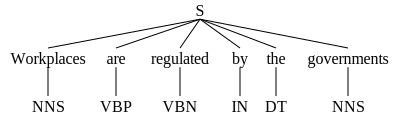

In [8]:
# To check replace the index [0]] in the result to view tree structure
grammar_np = r"NP:{<DT>?<JJ>*<NN>}"
chunk_parser=nltk.RegexpParser(grammar_np)
chunk_result=chunk_parser.parse(results[0])
chunk_result